In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['text.usetex'] = True

- Classification of same data using Artificial Neural Networks

In [2]:
def dataGenerator(cells, genes, vary='mu', mu0=5, sd = 1, delta=.1):
    x = np.zeros((genes, cells))
    if vary == 'mu':
        mu1, sd1 = mu0 - delta, sd
        mu2, sd2 = mu0, sd
        mu3, sd3 = mu0 + delta,sd
    elif vary == 'sd':
        mu1, sd1 = mu0-2, max(0.1, sd - delta)
        mu2, sd2 = mu0, sd
        mu3, sd3 = mu0+2, sd + delta
        
    x[:80,:] = np.random.normal(mu2, sd2, (80, 500))
    x[80:, :250] = np.random.normal(mu1, sd1, (20, 250))
    x[80:, 250:] = np.random.normal(mu3, sd3, (20, 250))
    
    return x

In [3]:
data = pd.DataFrame(dataGenerator(500, 100, delta=2, vary='mu', sd=1).T)
data.loc[:250, 'label'] = '0'
data.loc[250:, 'label'] = '1'


In [4]:
data.shape

(500, 101)

# ANN 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
X = data.iloc[:, :-1].values        
y = data.iloc[:, -1].values      

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_classes = len(np.unique(y))
y_encoded = to_categorical(y, num_classes=n_classes)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, activation='relu', input_shape=(100,)),
    Dense(5, activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.5, verbose=2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20
13/13 - 1s - 67ms/step - accuracy: 0.5400 - loss: 1.2861 - val_accuracy: 0.6100 - val_loss: 1.0190
Epoch 2/20
13/13 - 0s - 8ms/step - accuracy: 0.6350 - loss: 0.8562 - val_accuracy: 0.6650 - val_loss: 0.7462
Epoch 3/20
13/13 - 0s - 9ms/step - accuracy: 0.7100 - loss: 0.6146 - val_accuracy: 0.7750 - val_loss: 0.5891
Epoch 4/20
13/13 - 0s - 9ms/step - accuracy: 0.8250 - loss: 0.4907 - val_accuracy: 0.8200 - val_loss: 0.4931
Epoch 5/20
13/13 - 0s - 8ms/step - accuracy: 0.9000 - loss: 0.4154 - val_accuracy: 0.8450 - val_loss: 0.4355
Epoch 6/20
13/13 - 0s - 9ms/step - accuracy: 0.9200 - loss: 0.3691 - val_accuracy: 0.8850 - val_loss: 0.3901
Epoch 7/20
13/13 - 0s - 9ms/step - accuracy: 0.9400 - loss: 0.3263 - val_accuracy: 0.9250 - val_loss: 0.3540
Epoch 8/20
13/13 - 0s - 14ms/step - accuracy: 0.9600 - loss: 0.2936 - val_accuracy: 0.9500 - val_loss: 0.3187
Epoch 9/20
13/13 - 0s - 10ms/step - accuracy: 0.9700 - loss: 0.2609 - val_accuracy: 0.9650 - val_loss: 0.2863
Epoch 10/20
13/1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


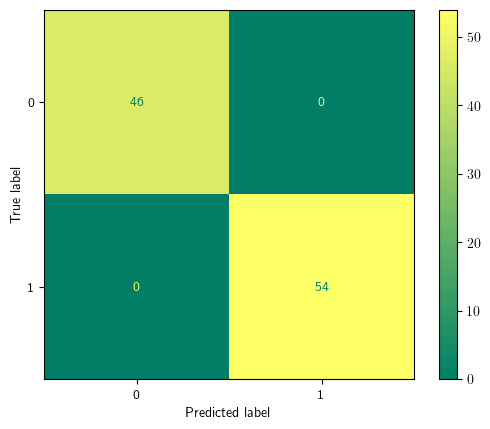

In [ ]:


y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='summer', values_format='d')
plt.show()